# Data 100 Project Spring 2020
## Analyzing the Impact of Social Distancing Policies

This notebook outlines the data cleaning, analysis, and visualizations associated with this part of the project.

In [1]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In this part of the project, we are looking at the impact that social distancing policies have had on the spread of  the coronovirus SARS-CoV-2 in the United States. By analyzing when different social distance policies were implemented, we hope to identify if there is an observable difference in confirmed COVID-19 cases among states that responded differently at the policy level to the outbreak. We hope to shed light on not only the importance of social distancing policies but also how responding quickly and decisively can drastically impact the spread of the virus. 

## Importing the Data

`states_data`: features by state such as total deaths, confirmed cases, etc. 

`states_cases`: time series of cases by state.

`abridged_counties`: county level data with information on demographics and social distancing policies. 

In [2]:
states_data = pd.read_csv("5.08states.csv") 
states_cases = pd.read_csv('us-states.csv')
abridged_counties = pd.read_csv("abridged_couties.csv")

## Data Cleaning & Organization

We reorganize `states_cases` so that each row denotes a state, each column heading corresponds to a certain day with, and each value represents the total cases in a given state on a given day.

In [3]:
states_cases = states_cases.pivot_table(
    index = 'state',
    columns = 'date',
    values = 'cases',
    fill_value = 0       
)
states_cases.head()

date,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07
state,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,6750,6925,7068,7294,7611,7888,8112,8437,8691,9046
Alaska,0,0,0,0,0,0,0,0,0,0,...,349,353,353,362,363,366,368,369,370,373
Arizona,0,0,0,0,0,1,1,1,1,1,...,6948,7202,7648,7962,8364,8640,8919,9305,9707,9945
Arkansas,0,0,0,0,0,0,0,0,0,0,...,3127,3207,3281,3310,3372,3431,3469,3525,3611,3694
California,0,0,0,0,1,2,2,2,2,2,...,46570,48904,50470,52318,53753,55072,56333,58848,60787,62481


`policies_data` has the the location based data (county and state names) and dates when social distancing  were enacted.

In [4]:
policies_data = abridged_counties[['CountyName', 'StateName', 'State', 'stay at home', '>50 gatherings',
       '>500 gatherings', 'public schools', 'restaurant dine-in', 'entertainment/gym', 'federal guidelines']]
policies_data.head()

,CountyName,StateName,State,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines
0,Autauga,AL,Alabama,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0
1,Baldwin,AL,Alabama,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0
2,Barbour,AL,Alabama,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0
3,Bibb,AL,Alabama,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0
4,Blount,AL,Alabama,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0


`StateName` is used as the index moving forward since no NaN values occur in this column. 

In [5]:
policies_data.isna().sum()

CountyName              0
StateName               0
State                 169
stay at home          592
>50 gatherings        221
>500 gatherings       221
public schools         25
restaurant dine-in     25
entertainment/gym      90
federal guidelines     25
dtype: int64

In [6]:
policies_data = policies_data.drop(columns = ['CountyName', 'State', 'federal guidelines'])
policies_data.head()

,StateName,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
0,AL,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0
1,AL,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0
2,AL,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0
3,AL,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0
4,AL,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0


The dates in `policies_data` are in Gregorian ordinal format. The dates are converted the dates to datetime, and the NaN values were filled as when the the dataset was last updated (April 18th).

In [7]:
policies_data.loc[:, "stay at home":] = policies_data.loc[:, "stay at home":].fillna(date.toordinal(date(2020, 4, 18))).astype('int')
for i in range(np.shape(policies_data.loc[:, "stay at home":])[1]):
    policies_data[policies_data.loc[:, "stay at home":].columns[i]] = policies_data.loc[:, "stay at home":].iloc[:, i].apply(date.fromordinal)
policies_data.head(5)

,StateName,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
0,AL,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
1,AL,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
2,AL,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
3,AL,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28
4,AL,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28


Some states have multiple dates for when these orders were given. To simplify the analysis since we are looking at overall state data for confirmed cases, the mode date will be chosen to represent when the order took place for each state. 

In [8]:
for x in range(len(policies_data.StateName.unique())):
    state = policies_data.StateName.unique()[x]
    if x < 5:
        print(state)
        print(policies_data[policies_data["StateName"]==state]["stay at home"].value_counts())

AL
2020-04-04    66
2020-03-26     1
Name: stay at home, dtype: int64
AK
2020-03-28    28
2020-04-18     3
2020-03-22     1
Name: stay at home, dtype: int64
AZ
2020-03-31    15
Name: stay at home, dtype: int64
AR
2020-04-18    75
Name: stay at home, dtype: int64
CA
2020-03-19    58
Name: stay at home, dtype: int64


`SocialDist` is used construct when social distance orders for specific states of interest. `SevenDayAvg` is used to calculate the 7 day average of new cases per day. The 7 day average is used to identify the overall trend in cases over time since day to day reports may fluctuate due to inconsistent testing throughout the week. NaN values occur when there were no cases reported yet, so these values are filled in as 0.

In [9]:
def SocialDist(df, states):
    result = pd.DataFrame()
    for state in states:
        result = result.append(df[df["StateName"]==state].mode())
    return result
def SevenDayAvg(df, states):
    result = pd.DataFrame()
    for state in states:
        result[state] = df.loc[state, :].diff().rolling(7).mean().fillna(0)
    return result

`SevenDayStates` contains the times series for the average new cases per day. Analysis is restricted to states and does not include territories of the US. 

In [10]:
SevenDayStates = SevenDayAvg(states_cases, states_cases.index)
SevenDayAvg(states_cases, states_cases.index)
SevenDayStates = SevenDayStates.drop(columns = ["Guam", "Northern Mariana Islands", "Puerto Rico", "Virgin Islands"])
SevenDayStates.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Comparing  Social Distancing Policies in Four States

`SocialDistCA_TX` contains the dates for when different social distancing policies were enacted in California, New York, Texas, and Iowa.

In [11]:
states = ["CA", "NY", "IA", "TX"]
SocialDistCA_TX = SocialDist(policies_data, states)
SocialDistCA_TX

,StateName,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
0,CA,2020-03-19,2020-03-19,2020-03-19,2020-03-19,2020-03-15,2020-03-15
0,NY,2020-03-22,2020-03-16,2020-03-13,2020-03-18,2020-03-16,2020-03-16
0,IA,2020-04-18,2020-04-02,2020-04-02,2020-04-02,2020-03-17,2020-03-17
0,TX,2020-04-02,2020-03-21,2020-03-14,2020-03-23,2020-03-19,2020-03-19


Overall amongst all types of social distancing strategies, entertainment/gym and restaurant dine-in restrictions varied the least while stay at home orders varied the most. California and New York (March 19th and March 22nd, respectively) implemented stay at home orders much earlier than Texas and Iowa (Iowa did not implement a stay at home order as of April 18th). 

### Visualization of Social Distancing Outcomes

Now, the 7 day average in new cases for each of these four states is plotted along with annotations for when their social distancing policies were implemented. 

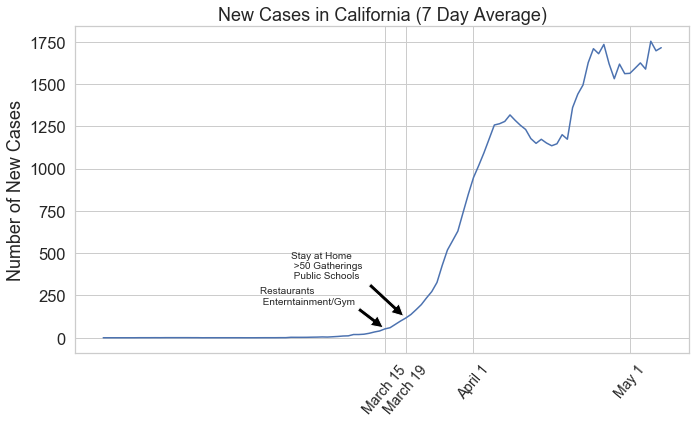

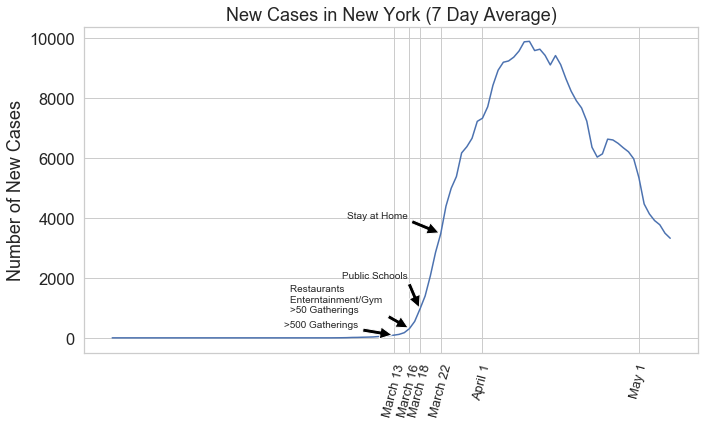

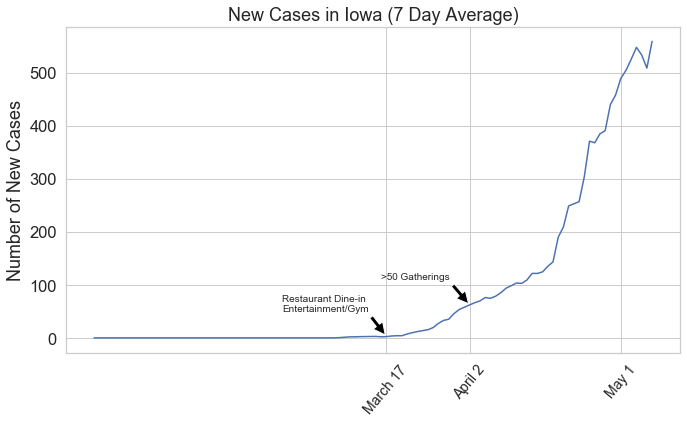

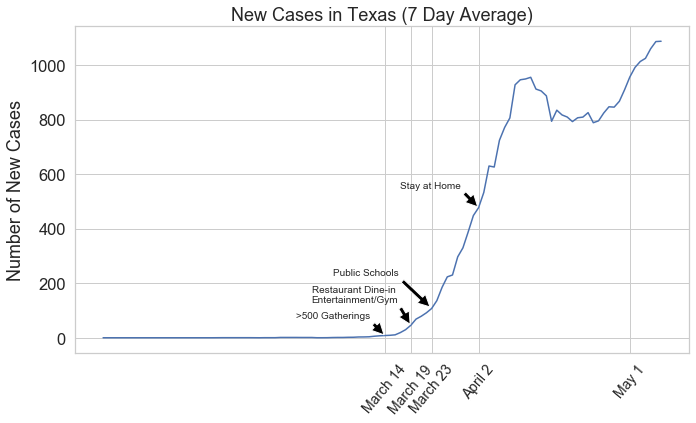

In [12]:
figCA = plt.figure(figsize = (11, 6))
axCA = figCA.add_subplot(111)
axCA.plot(SevenDayStates["California"].index, SevenDayStates["California"])
axCA.annotate('Stay at Home \n >50 Gatherings \n Public Schools', xy = (58, SevenDayStates["California"].iloc[58]), 
            xytext = (36, 350), 
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axCA.annotate('Restaurants \n Enterntainment/Gym', xy = (54, SevenDayStates["California"].iloc[54]),
            xytext = (30, 200),
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axCA.xaxis.set_ticks([54, 58, 71, 101])
axCA.set_xticklabels(["March 15", "March 19", "April 1", "May 1"], rotation = 50, fontsize = 14)
axCA.set_title("New Cases in California (7 Day Average)")
axCA.set_ylabel("Number of New Cases");

figNY = plt.figure(figsize = (11, 6))
axNY = figNY.add_subplot(111)
axNY.plot(SevenDayStates["New York"].index, SevenDayStates["New York"])
axNY.annotate('>500 Gatherings', xy = (54, SevenDayStates["New York"].iloc[54]), 
            xytext = (33, 350), 
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axNY.annotate('Restaurants \nEnterntainment/Gym \n>50 Gatherings' , xy = (57, SevenDayStates["New York"].iloc[57]),
           xytext = (34, 850),
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axNY.annotate('Public Schools', xy = (59, SevenDayStates["New York"].iloc[59]),
           xytext = (44, 2000),
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axNY.annotate('Stay at Home', xy = (63, SevenDayStates["New York"].iloc[63]),
            xytext = (45, 4000),
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axNY.xaxis.set_ticks([54, 57, 59, 63, 71, 101])
axNY.set_xticklabels(["March 13", "March 16", "March 18", "March 22", "April 1", "May 1"],
                     rotation = 75,
                     fontsize = 13)
axNY.set_title("New Cases in New York (7 Day Average)")
axNY.set_ylabel("Number of New Cases");

figIA = plt.figure(figsize = (11, 6))
axIA = figIA.add_subplot(111)
axIA.plot(SevenDayStates["Iowa"].index, SevenDayStates["Iowa"])
axIA.annotate('Restaurant Dine-in \nEntertainment/Gym', xy = (56, SevenDayStates["Iowa"].iloc[57]), 
            xytext = (36,50), 
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axIA.annotate('>50 Gatherings', xy = (72, SevenDayStates["Iowa"].iloc[72]),
            xytext = (55, 110),
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axIA.xaxis.set_ticks([56, 72, 101])
axIA.set_xticklabels(["March 17", "April 2", "May 1"],
                     rotation = 50,
                     fontsize = 14);
axIA.set_title("New Cases in Iowa (7 Day Average)")
axIA.set_ylabel("Number of New Cases");

figTX = plt.figure(figsize = (11, 6))
axTX = figTX.add_subplot(111)
axTX.plot(SevenDayStates["Texas"].index, SevenDayStates["Texas"])
axTX.annotate('>500 Gatherings', xy = (54, SevenDayStates["Texas"].iloc[54]), 
            xytext = (37,70), 
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axTX.annotate('Restaurant Dine-in \nEntertainment/Gym', xy = (59, SevenDayStates["Texas"].iloc[59]), 
            xytext = (40,130), 
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axTX.annotate('Public Schools', xy = (63, SevenDayStates["Texas"].iloc[63]), 
            xytext = (44,230), 
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axTX.annotate('Stay at Home', xy = (72, SevenDayStates["Texas"].iloc[72]),
            xytext = (57, 550),
            fontsize = 10,
            arrowprops=dict(facecolor='black', shrink=0.05))
axTX.xaxis.set_ticks([54, 59, 63, 72, 101])
axTX.set_xticklabels(["March 14", "March 19", "March 23", "April 2", "May 1"],  rotation = 50, fontsize = 14);
axTX.set_title("New Cases in Texas (7 Day Average)")
axTX.set_ylabel("Number of New Cases");

From the above, California, New York, and Texas, there aren't prolonged decreases or plateaus in new cases until after social distancing policies are implemented. It appears that only limiting social gatherings, closing schools, and restricint dine-in restaurants/entertainment on their own have not slowed the amount of cases. Iowa for example does not exhibit any reductions in cases. This data suggests that a strict stay at home order is required to slow the spread of a disease as contagious as COVID-19. However, this is still a small sample size on only four states, and more analysis will be required to verify this difference in outcomes amongst states.

### Quantifying When Social Distancing Policies were Implemented for Four States

`findgrowth` is used to identify when the coronavirus began spreading in each state. The beginning of the "spread" is defined as when the 7 day average in new cases was greater than 1. This method is intended to to assess how quickly state governemnts reacted to the spread of the virus in their own states.

In [13]:
def findgrowth(sevenday, states):
    result = pd.DataFrame()
    for state in states:
        result = result.append(
            pd.DataFrame(
                [date.toordinal(
                    datetime.strptime(sevenday[state][sevenday[state]>1].head(1).index[0], '%Y-%m-%d'))], [state]))
    return result

The data must be in ordinal format to find the difference between when social distancing policies were enacted and cases began to grow. `first_growth` are when cases began to grow. `days_after_1st` are the amount of days each policy was enacted after cases began to grow. 

In [14]:
for i in range(6):
    SocialDistCA_TX[SocialDistCA_TX.loc[:, "stay at home":].columns[i]] = SocialDistCA_TX.loc[:, "stay at home":].iloc[:, i].apply(date.toordinal)
states = ["California", "New York", "Iowa", "Texas"]
first_growth = findgrowth(SevenDayStates, states)
first_growth.index.name = "State"
days_after_1st = SocialDistCA_TX.set_index("StateName") - np.array(first_growth)
days_after_1st

,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym
StateName,,,,,,
CA,22,22,22,22,18,18
NY,18,12,9,14,12,12
IA,40,24,24,24,8,8
TX,38,26,19,28,24,24


Stay at home orders began a lot sooner in California and New York relative to when cases began growing while reaction time to enact other polices varied among all states with New York consistently acting early in their polices. New York  as seen in the figures above has also had the largest overall reduction in average new cases per day. 

## Comparing Stay at Home Orders and Their Outcomes for the Entire US

The analysis so far has only been focused on a few states. The scope is now broadened to include more states to see if a trend can be generalized for the entire country. The focus will be on how the outcomes in cases per day differs between states that had quicker responses to those with slower responses. Differences in stay at home orders will be analyzed since this is the strictest policy in place and the results so far indicate that it is an important factor in limiting disease spread.

### Redefining the Reaction Time

Instead of finding the day that cases began to grow, stay at home orders reactions will be made in reference to days after a state of national emergency was declared. Since some states may have not had capabilities of testing until after this point, setting this day as a reference point allows for a comparison of how each state reacted to federal guidelines. The declaration was made on March 16th according to the `policies_data` dataset. 

The stay at home dates are converted to ordinal format using `ordinalfxn` so that the values can be substracted as integers representing days. `StayatHomeDays` lists the amount of days that stay at home orders were given for each state after March 16th.

In [15]:
def ordinalfxn(df, column):
    for x in df.index:
        df.loc[x, column] = date.toordinal(df.loc[x, column])
    return df

In [16]:
StayatHomeDates = pd.DataFrame()
for x in policies_data['StateName'].unique():
    StayatHomeDates = StayatHomeDates.append(pd.DataFrame([policies_data.loc[policies_data["StateName"] == x, "stay at home"].head(1).iloc[0]], [x]))
StayatHomeDates = StayatHomeDates.rename(columns = {0:'Stay at Home'})
StayatHomeDates = ordinalfxn(StayatHomeDates, "Stay at Home").drop(['GU', 'PR', 'AS', 'MP', 'VI'])
StayatHomeDates = StayatHomeDates.set_index(SevenDayStates.columns)
StayatHomeDays = StayatHomeDates - np.array(abridged_counties["federal guidelines"][0].astype(int))
StayatHomeDays.index.name = "State"
StayatHomeDays.head()

,Stay at Home
State,
Alabama,19
Alaska,12
Arizona,15
Arkansas,33
California,3


The distribution of `StayatHomeDays` is plotted as a histogram.

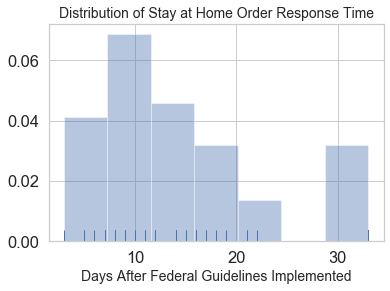

In [17]:
ax = sns.distplot(StayatHomeDays, rug = True, kde = False, norm_hist = True)
ax.set_title("Distribution of Stay at Home Order Response Time", fontsize = 14)
ax.set_xlabel("Days After Federal Guidelines Implemented", fontsize = 14);

The distriubtion of `StayatHomeDays` is right skewed with most states reacting within about 12 days of when a federal state of emergency was declared.

### Normalizing the Data

To conduct this analysis, growth rates in cases need to be calculated for each state. This is done by normalizing the new cases per day dataset on a per capita basis. Using the 2018 population estimate for each state from the `abrdiged_counties`, the new cases per day per 100,000 people are calculated. 

In [18]:
state_pop = abridged_counties[['StateName', 'PopulationEstimate2018']].groupby("StateName").sum()
state_pop = state_pop.drop(['GU', 'PR', 'AS', 'MP', 'VI'])
state_pop["State"] = StayatHomeDays.index
state_pop = state_pop.set_index("State")
for state in SevenDayStates.columns:
    SevenDayStates[state] = SevenDayStates[state]/state_pop.loc[state][0]*100000

### Visualizing the Outcomes of Different Stay at Home Order Reaction Times

The now normalized `SevenDayStates` is plotted for each 2 different groups of states over time where  `EarlyActionCases` are for states that implemented stay at home orders within 12 days of the federal state of emergency declaration while the `LateActionCases` represent those that acted at least 12 days after the delceration.

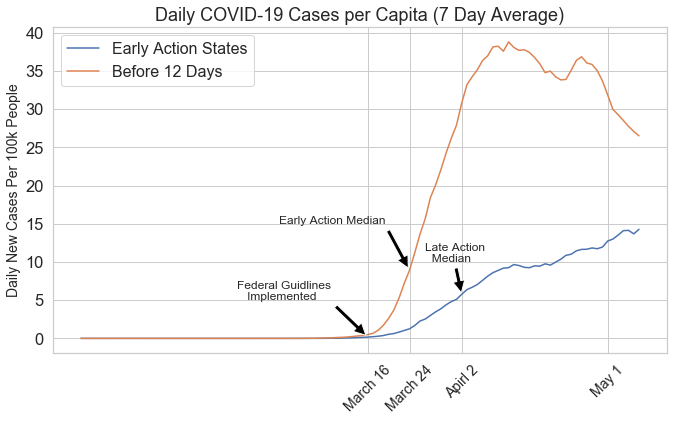

In [19]:
plt.figure(figsize = (11, 6))
LateActionIndex = StayatHomeDays[StayatHomeDays["Stay at Home"]>12].index
LateActionCases = SevenDayStates.loc[:, (LateActionIndex)].T.sum()/len(LateActionIndex)
plt.plot(LateActionCases.index, LateActionCases);
plt.xticks([55,  71, 101], ['March 16', 'April 1', 'May 1'], rotation = 45, fontsize = 14);
EarlyActionIndex = StayatHomeDays[StayatHomeDays["Stay at Home"]<=12].index
EarlyActionCases = SevenDayStates.loc[:, (EarlyActionIndex)].T.sum()/len(EarlyActionIndex)
plt.plot(EarlyActionCases.index, EarlyActionCases);
plt.xticks([55, 63, 73, 101], ['March 16', 'March 24', 'Apirl 2', 'May 1'], rotation = 45, fontsize = 14);
plt.legend(["Early Action States", "Before 12 Days"], fontsize = 16);
plt.annotate('Federal Guidlines\n   Implemented', xy = (55, LateActionCases.iloc[55]), 
            xytext = (30, 5), 
            fontsize = 12,
            arrowprops=dict(facecolor='black', shrink=0.05));
plt.annotate('Early Action Median', xy = (63, EarlyActionCases.iloc[63]), 
            xytext = (38, 15), 
            fontsize = 12,
            arrowprops=dict(facecolor='black', shrink=0.05));
plt.annotate('Late Action\n  Median', xy = (73, LateActionCases.iloc[73]), 
            xytext = (66, 10), 
            fontsize = 12,
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("Daily COVID-19 Cases per Capita (7 Day Average)");
plt.ylabel("Daily New Cases Per 100k People", fontsize = 14);

Cases didn't begin growing in both groups until after federal guidelines were put in place. This feature is likely due to the limited availaiblity of testing at the beginning of the outbreak in the US. Now comparing the overall long term trends between both groups up until May 8th, the early action states appear to have reversed the growth in new cases per day (the 7 day average of new cases per capita is decreasing). The late action states, however, are still experiencing growth in new cases per capita. This trend illustrates the importance of implementing social distancing policies as soon as possible even if a large amount of cases haven't yet been confirmed in a given state. 

## Analyzing the Visualization Trends

In [20]:
print("Early Action States:")
print( "Median Days after Federal Guidlines:", StayatHomeDays.loc[EarlyActionIndex].median()[0])
print("Average Testing Rate:", states_data.set_index("Province_State").loc[EarlyActionIndex, "Testing_Rate"].mean().round())
print("Late Action States:")
print( "Median Days after Federal Guidlines:", StayatHomeDays.loc[LateActionIndex].median()[0])
print("Average Testing Rate:", states_data.set_index("Province_State").loc[LateActionIndex, "Testing_Rate"].mean().round())


Early Action States:
Median Days after Federal Guidlines: 8.0
Average Testing Rate: 3248.0
Late Action States:
Median Days after Federal Guidlines: 18.0
Average Testing Rate: 2656.0


To further validate this result, the average testing rates for each group was calculated. For the late action states, testing rates are actually lower, which indicates that the the difference in trends is significant and that the late action curve is likely an underestimate of the actual growth in new cases per capita. 

In [21]:
print("Early Action States:", np.array(EarlyActionIndex))
print("Late Action States:", np.array(LateActionIndex))

Early Action States: ['Alaska' 'California' 'Colorado' 'Connecticut' 'Delaware' 'Florida'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Kentucky' 'Louisiana'
 'Massachusetts' 'Michigan' 'Minnesota' 'Montana' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'Ohio' 'Oregon' 'Rhode Island'
 'Vermont' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Late Action States: ['Alabama' 'Arizona' 'Arkansas' 'District of Columbia' 'Georgia' 'Iowa'
 'Kansas' 'Maine' 'Maryland' 'Mississippi' 'Missouri' 'Nebraska' 'Nevada'
 'North Carolina' 'North Dakota' 'Oklahoma' 'Pennsylvania'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia']


Another key difference between the two groups of states lies in the magnitude of the growth rates. The early action states experienced a larger and overall peak in daily cases per capita lending to higher overall infections rates compared to the later action states. Looking at a the states in the early action group, there are more of the densely populated states such as New York, New Jersey, and California, which would be expected to have higher infection rates given their higher population densities espeically with a  disease such as contagious as COVID-19. However, further analysis would be requried to identify more of the key features that have led to this difference. 

The late action states may have felt less of an incentive to enact strict social distancing orders given their slower climb in cases; however, the overall trend shows the danger of choosing a reactive approach compared to a proactive approach. With several states now considering reopening, the effect that strict social distancing has had in states where we have seen a large reduction in cases should be considered before these decisions are made. The abseence of swift stay at home orders has shown appreciable reductions in cases over time, so the opposite will likley be true if swiftness is applied in relaxing these restrictions.

In [22]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>